In [132]:
# Adds logging
import logging
import glob # To read all csv files in the directory
logging.raiseExceptions = False

logger = logging.getLogger('natural_language_analysis')
hdlr = logging.FileHandler('natural_language_analysis.log', encoding="utf-8")
formatter = logging.Formatter('%(asctime)s %(levelname)s %(message)s')
hdlr.setFormatter(formatter)
logger.addHandler(hdlr) 
logger.setLevel(logging.DEBUG)

def cell_log(number, name=None):
    if name == None:
        logger.info("Cell no: {}".format(number))
    else:
        logger.info("Cell name: {} number {}".format(name, number))

import numpy as np
import pandas as pd

data_imported = pd.concat([pd.read_csv(f) for f in glob.glob('Kickstarter*.csv')], ignore_index = True)
cell_log(0, "imports")
data_imported.head(10)

,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,staff_pick,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,last_update_published_at,unread_messages_count,unseen_activity_count
0,76,Dave-Man. A game about getting Dave his coffee.,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",697,US,the United States,1541608918,"{""id"":294143625,""name"":""Lou Bagel"",""is_registe...",USD,$,...,False,successful,1556654150,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",697.000000,domestic,NaN,NaN,NaN
1,6,"My Vision ""Shanghai Dreaming Podcast""this seri...","{""id"":41,""name"":""Jazz"",""slug"":""music/jazz"",""po...",440,US,the United States,1377505616,"{""id"":1097916022,""name"":""Sabrina Montgomery"",...",USD,$,...,False,failed,1382136006,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",440.000000,domestic,NaN,NaN,NaN
2,2,I have always loved cookies and have a great r...,"{""id"":313,""name"":""Small Batch"",""slug"":""food/sm...",40,US,the United States,1424288631,"{""id"":1496002217,""name"":""daniel koert"",""is_reg...",USD,$,...,False,failed,1426952931,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",40.000000,domestic,NaN,NaN,NaN
3,73,Kickstarter Campaign for the The Art of Mitch ...,"{""id"":45,""name"":""Art Books"",""slug"":""publishing...",11192,US,the United States,1463615618,"{""id"":999214729,""name"":""Mitch Foust"",""is_regis...",USD,$,...,False,successful,1468202400,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",11192.000000,domestic,NaN,NaN,NaN
4,0,"I want to make this an app that, 33 states and...","{""id"":51,""name"":""Software"",""slug"":""technology/...",0,US,the United States,1508774685,"{""id"":1461334453,""name"":""Sylvester S. Harris I...",USD,$,...,False,failed,1511458248,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",0.000000,domestic,NaN,NaN,NaN
5,37,A retro point & click adventure game about rad...,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",613,DE,Germany,1468785449,"{""id"":2145295147,""name"":""Fox1986"",""is_register...",EUR,€,...,False,successful,1474234200,1.103205,"{""web"":{""project"":""https://www.kickstarter.com...",606.883998,domestic,NaN,NaN,NaN
6,65,Creating a 2018 wall calendar to bring the los...,"{""id"":22,""name"":""Illustration"",""slug"":""art/ill...",2514,GB,the United Kingdom,1507078979,"{""id"":1123361126,""name"":""Love Menu Art"",""is_re...",GBP,£,...,False,successful,1509847200,1.328551,"{""web"":{""project"":""https://www.kickstarter.com...",2554.802708,domestic,NaN,NaN,NaN
7,6,Making it possible to work on VBA projects wit...,"{""id"":51,""name"":""Software"",""slug"":""technology/...",60,NZ,New Zealand,1420401314,"{""id"":1534183293,""name"":""Ross Knudsen"",""is_reg...",NZD,$,...,False,failed,1423717588,0.785897,"{""web"":{""project"":""https://www.kickstarter.com...",64.443522,domestic,NaN,NaN,NaN
8,13,Beautiful hand crafted leather roses made one ...,"{""id"":25,""name"":""Sculpture"",""slug"":""art/sculpt...",480,US,the United States,1435921412,"{""id"":1707899074,""name"":""Starr Klein"",""slug"":""...",USD,$,...,False,successful,1441112200,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",480.000000,domestic,NaN,NaN,NaN
9,77,Original 8-bit inspired retrofuturistic video ...,"{""id"":35,""name"":""Video Games"",""slug"":""games/vi...",4130,US,the United States,1394586741,"{""id"":1766442648,""name"":""Strangelette (deleted...",USD,$,...,True,successful,1406610010,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",4130.000000,domestic,NaN,NaN,NaN


In [133]:
cell_log(1)
def remove_those_nan(string):
    if isinstance(string, float):
        if np.isnan(string):
            print("That's a nan")
        return False
    else:
        return True

#print(data_imported[data_imported["blurb"].apply(is_not_ascii)])
data_imported = data_imported.copy()
data_imported.loc[:, "blurb"] = data_imported.blurb.dropna(how="any")
data_imported = data_imported[data_imported.blurb.apply(remove_those_nan)]
print(data_imported.shape[0])
print(data_imported.shape[0])

That's a nan
That's a nan
That's a nan
That's a nan
That's a nan
That's a nan
That's a nan
That's a nan
That's a nan
That's a nan
That's a nan
That's a nan
287123
287123


In [135]:
cell_log(2, "imports for nlp")
from sklearn.feature_extraction.text import HashingVectorizer
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import classification_report

# Bring in the stemmer and grab the stopwords
import nltk
from nltk.stem.snowball import EnglishStemmer
from nltk import word_tokenize
nltk.download("stopwords")
nltk.download('punkt')

import re

# Split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\manib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\manib\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [136]:
# Encode y
Encoder = LabelEncoder()
y_encode = Encoder.fit_transform(data_imported.state)
Encoder.classes_

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

In [137]:
# Encode y
Encoder = LabelEncoder()
y_encode = Encoder.fit_transform(data_imported.state)
X_train, X_test, y_train, y_test = train_test_split(data_imported.blurb, 
                                                    y_encode, 
                                                    test_size=0.2, 
                                                    random_state=42)

In [138]:
cell_log(3, "tokenizer")

# Originally used a stemming, so this is poorly named now
def stem_tokenizer(text):
    words = word_tokenize(text)
    to_return = []
    for word in words:
        to_return.append(word.replace('.', " ").replace('!', " "))
    logger.debug("Vocabulary: {}".format(' '.join(to_return)))
    return to_return

In [139]:
cell_log(7)
from sklearn.feature_extraction.text import TfidfVectorizer

In [140]:
cell_log(10)

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

In [141]:
# Example category value
data_imported.iloc[0]['category']

'{"id":35,"name":"Video Games","slug":"games/video games","position":7,"parent_id":12,"parent_name":"Games","color":51627,"urls":{"web":{"discover":"http://www.kickstarter.com/discover/categories/games/video%20games"}}}'

In [142]:
# Extracting the relevant sub-category section from the string
f = lambda x: x['category'].split('/')[1].split('","position')[0]
data_imported['sub_category'] = data_imported.apply(f, axis=1)

# Extracting the relevant category section from the string, and replacing the original category variable
f = lambda x: x['category'].split('"slug":"')[1].split('/')[0]
data_imported['category'] = data_imported.apply(f, axis=1)
f = lambda x: x['category'].split('","position"')[0] # Some categories do not have a sub-category, so do not have a '/' to split with
data_imported['category'] = data_imported.apply(f, axis=1)

In [143]:
# Counting the number of unique categories
print(f"There are {data_imported.category.nunique()} unique categories and {data_imported.sub_category.nunique()} unique sub-categories.")

There are 15 unique categories and 147 unique sub-categories.


In [144]:
print(len(data_imported[data_imported.duplicated(subset='id')]), "duplicated projects remain.")
duplicated = data_imported[data_imported.duplicated(subset='id', keep=False)].sort_values(by='id')
duplicated

132073 duplicated projects remain.


,backers_count,blurb,category,converted_pledged_amount,country,country_displayable_name,created_at,creator,currency,currency_symbol,...,state,state_changed_at,static_usd_rate,urls,usd_pledged,usd_type,last_update_published_at,unread_messages_count,unseen_activity_count,sub_category
104298,3,All your herbal tea remedies here. From colds ...,food,96,US,NaN,1534903328,"{""id"":160842473,""name"":""Vito Finazzo"",""is_regi...",USD,$,...,failed,1540093916,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",96.000000,domestic,NaN,NaN,NaN,drinks
142069,3,All your herbal tea remedies here. From colds ...,food,96,US,NaN,1534903328,"{""id"":160842473,""name"":""Vito Finazzo"",""is_regi...",USD,$,...,failed,1540093916,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",96.000000,domestic,NaN,NaN,NaN,drinks
15310,3,All your herbal tea remedies here. From colds ...,food,96,US,the United States,1534903328,"{""id"":160842473,""name"":""Vito Finazzo"",""is_regi...",USD,$,...,failed,1540093916,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",96.000000,domestic,NaN,NaN,NaN,drinks
43818,3,All your herbal tea remedies here. From colds ...,food,96,US,NaN,1534903328,"{""id"":160842473,""name"":""Vito Finazzo"",""is_regi...",USD,$,...,failed,1540093916,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",96.000000,domestic,NaN,NaN,NaN,drinks
181188,505,America’s greatest battle as you have never se...,film & video,66237,US,NaN,1352230054,"{""id"":1026020262,""name"":""Jake Boritt"",""slug"":""...",USD,$,...,successful,1364759795,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",66237.000000,domestic,NaN,NaN,NaN,television
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22565,13,The first male portrait - and bodyart calendar...,photography,290,DE,Germany,1517747024,"{""id"":1796304326,""name"":""Max Kyle"",""slug"":""max...",EUR,€,...,failed,1520849182,1.225379,"{""web"":{""project"":""https://www.kickstarter.com...",289.189461,domestic,NaN,NaN,NaN,people
137930,13,An oboe recital with music and photography to ...,music,915,US,the United States,1375640768,"{""id"":1763180118,""name"":""Jennifer Stucki"",""is_...",USD,$,...,successful,1379825940,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",915.000000,domestic,NaN,NaN,NaN,classical music
196918,13,An oboe recital with music and photography to ...,music,915,US,the United States,1375640768,"{""id"":1763180118,""name"":""Jennifer Stucki"",""is_...",USD,$,...,successful,1379825940,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",915.000000,international,NaN,NaN,NaN,classical music
79977,53,MOMENTS OF INSIGHT is a project consisting of ...,art,18758,US,the United States,1303753700,"{""id"":1743305220,""name"":""Chaucer Silverson"",""i...",USD,$,...,successful,1312432269,1.000000,"{""web"":{""project"":""https://www.kickstarter.com...",18758.000000,domestic,NaN,NaN,NaN,conceptual art


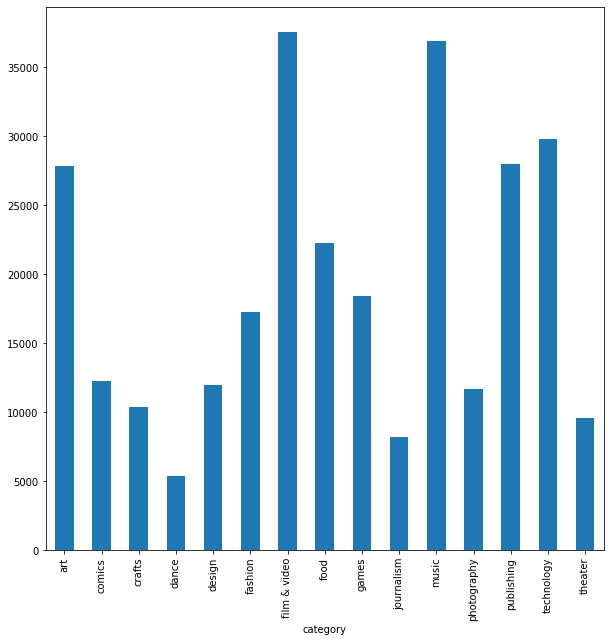

In [145]:
data_imported.groupby("category").count().state.plot(kind='bar', figsize=(10, 10))

In [146]:
cols_of_interest = ["category", "state", "blurb", "goal"]
df_cat_stat = data_imported[cols_of_interest]

mean_l = df_cat_stat.goal.mean()
std_l = df_cat_stat.goal.std()
def normalize(x):
    """
    Normalizes the data shifting the data so 0 can't be negative
    """
    return (x - mean_l)/std_l + ((mean_l)/std_l)
df_cat_stat["goal"] = df_cat_stat.goal.apply(normalize)

# Turns the categories into integers.
df_cat_stat.loc[:, "cat_id"] = df_cat_stat["category"].factorize()[0]

# I need to be able to map these two together
arr_cat, cat = df_cat_stat["category"].factorize()
id_to_category_dic = {id_ : cat for id_, cat in enumerate(cat)}
category_to_id = {cat : id_ for id_, cat in enumerate(cat)}
df_cat_stat.head()

C:\Users\manib\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\manib\.conda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:845: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\manib\.conda\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sli

,category,state,blurb,goal,cat_id
0,games,successful,Dave-Man. A game about getting Dave his coffee.,0.000118,0
1,music,failed,"My Vision ""Shanghai Dreaming Podcast""this seri...",0.039229,1
2,food,failed,I have always loved cookies and have a great r...,0.039229,2
3,publishing,successful,Kickstarter Campaign for the The Art of Mitch ...,0.003923,3
4,technology,failed,"I want to make this an app that, 33 states and...",0.039229,4


In [148]:
vect = TfidfVectorizer(min_df=10, ngram_range=(1, 2), sublinear_tf=True, norm="l2")
print(data_imported.blurb.shape)
# SPARSE MATRIX
blurbs_to_vect = vect.fit_transform(data_imported.blurb)
print(blurbs_to_vect.shape)

(287123,)
(287123, 78919)


In [156]:
# Works with sparse matrix
from sklearn.feature_selection import chi2

for main_category, id_ in sorted(category_to_id.items()):
    # The y here is a vector with 1 (a True) where the item is the category of interest
    important_words = chi2(blurbs_to_vect, (df_cat_stat.cat_id == id_) & (df_cat_stat.state == "successful"))
    word_indices_best_words = np.argsort(important_words[0])
    best_words = np.array(vect.get_feature_names())[word_indices_best_words]
    print("Top 5 words associated with successful kickstarters in the category: {}\nWords:\n{}".format(main_category, '\n'.join(best_words[-5:])))
    
    # The y here is a vector with 1 (a True) where the item is the category of interest
    important_words = chi2(blurbs_to_vect, (df_cat_stat.cat_id == id_) & (df_cat_stat.state == "failed"))
    word_indices_best_words = np.argsort(important_words[0])
    best_words = np.array(vect.get_feature_names())[word_indices_best_words]
    print("Top 5 words associated with failed kickstarters in the category: {}\nWords:\n{}".format(main_category, '\n'.join(best_words[-5:])))

Top 5 words associated with successful kickstarters in the category: art
Words:
paintings
enamel pins
art
pins
enamel
Top 5 words associated with failed kickstarters in the category: art
Words:
paintings
sculptures
painting
sculpture
art
Top 5 words associated with successful kickstarters in the category: comics
Words:
graphic
comics
comic book
graphic novel
comic
Top 5 words associated with failed kickstarters in the category: comics
Words:
manga
comic
webcomic
graphic
graphic novel
Top 5 words associated with successful kickstarters in the category: crafts
Words:
wooden bowls
pens made
knitting
yarn
pens
Top 5 words associated with failed kickstarters in the category: crafts
Words:
candle
scented
wood
soy
candles
Top 5 words associated with successful kickstarters in the category: dance
Words:
contemporary dance
dance company
ballet
dancers
dance
Top 5 words associated with failed kickstarters in the category: dance
Words:
ballet
dance academy
danse
de danse
dance
Top 5 words associa